# Processing a Folder of Tip Logs
Tim Tyree<br>
6.22.2021

In [18]:
from lib.my_initialization import *
from lib import *

from lib.my_initialization import *
from lib.utils.utils_traj import *

from lib.utils.operari import *


import trackpy, pandas as pd, numpy as np
from lib import *
from lib.routines.track_tips import *
from lib.utils.dist_func import *
from lib.utils.utils_traj import *

from lib.routines.compute_trajectories import *
from lib.routines.dag_log_to_msd import *
from lib.routines.compute_msd import *

import trackpy
%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# particle tracking and computation of mean squared displacements for a folder of tip logs

In [3]:
# #find file interactively
print("please select a file from within the desired folder.")
file = search_for_file()
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/Log/ic001.21_log.csv'
print(file)
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/Log/ic_200x200.001.12_log.csv'
input_fn=file
# ds=10
# width=10
ds=5
width=200
height=width
DS=ds/width

# # input_fn=search_for_file()
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# df=pd.read_csv(input_fn)
# print(input_fn)
# DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")

trgt='log.csv'
assert(file[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(file,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

please select a file from within the desired folder.
File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/Log/ic200x200.0.3_log.csv
/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/Log/ic200x200.0.3_log.csv
number of files in list: 324


In [4]:
# df.head()

#Does df need to have the column, 'frame'?

In [5]:
#works for repositories outside of care
input_fn=file
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
ic_suite_fn=os.path.dirname(trial_folder_name)
# ic_suite_fn=ic_suite_fn.split('/')[-1]
print(ic_suite_fn)
trial_folder_name=trial_folder_name.split('/')[-1]
print(trial_folder_name)

/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200
param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025


In [6]:
# input_fn=file
# os.path.dirname(input_fn)
# str_lst=input_fn[input_fn.find('/Data/')+len('/Data/'):].split('/')
# ic_suite_fn=f"{nb_dir}/Data/"+str_lst[0]
# trial_folder_name=str_lst[1]
# print(ic_suite_fn)
# print(trial_folder_name)

In [7]:
#generate trajectories, unwrapped trajectories, and mean squared displacements for folder of tip logs
npartitions=os.cpu_count()

# #particle models
# ds=10
# width=10
# kwargs={
#     'input_fn_lst':file_name_list,
#     'L':width,
#     'DS':ds/width,
#     'use_cache_0':True,
#     'use_cache_1':True,
#     'npartitions':npartitions,
#     'sr':3*width,
#     'mem':0,
#     'trial_folder_name':trial_folder_name,
#     'ic_suite_fn':ic_suite_fn
# }

#full models
ds=5
width=200
kwargs={
    'input_fn_lst':file_name_list,
    'L':width,
    'DS':ds/width,
    'use_cache_0':True,
    'use_cache_1':True,
    'npartitions':npartitions,
    'sr':3*width,
    'mem':0,
    'trial_folder_name':trial_folder_name,
    'ic_suite_fn':ic_suite_fn
}


In [8]:
df_summary=workflow_reduce_logs_to_diffcoeff_summary(**kwargs)
beep(1)

Frame 148671: 2 trajectories present.
reducing 324 unwrapped trajectories files to a single row describing the diffusion coefficient of spiral tips for that trial...
Num. file names in list = 324.
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/msd/fig
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/msd/fig
saved figure in 
	/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/msd/fig
generating diffcoeff_figures for param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025
	num. trials that didn't show a tip lasing longer than 150ms is 0, and that didn't show am Rsquared of at least 0.0 is 61
saved diffcoeff_summary to /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200

0

In [20]:
#TODO: fix D and Delta_D measurements for functions that compute df_summary

# analyze annihilation/creation events

## annihilation events

In [ ]:
#select a file from trajectories/
# input_fn=search_for_file()

# #particle model
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/trajectories/pbc_particle_log81_traj_sr_30_mem_0.csv"
# ds=10
# width=10


#LR
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.21_traj_sr_600_mem_0.csv'
# # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv'
input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic004.13_traj_sr_600_mem_0.csv'

#FK
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
ds=5
width=200

height=width
df=pd.read_csv(input_fn);print(input_fn)
DT=compute_DT(df,round_t_to_n_digits=5);print(f"the time resolution is {DT} ms.")
DS=ds/width

In [ ]:
trgt=input_fn[input_fn.find('_traj_'):]
# trgt='_traj_sr_600_mem_0.csv'
assert(input_fn[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(input_fn,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

In [5]:
# df.head()

In [ ]:
# #particle model
min_duration=20  #20. #ms
min_range   =1  #cm
filter_beginning=True
use_min_duration=True
use_grad_voltage=False
range_threshold=10 #cm
round_t_to_n_digits=5
tmin=100.

#full model
min_duration=20##20. #ms
min_range   =1.  #cm
filter_beginning=True
use_min_duration=True
use_grad_voltage=True
tmin=100#ms


# npartitions=1#1
npartitions=os.cpu_count()

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
    'npartitions':npartitions,
    'filter_beginning':filter_beginning,
    'use_grad_voltage':use_grad_voltage,
    'use_min_duration':use_min_duration,
    'range_threshold':range_threshold,
    'round_t_to_n_digits':round_t_to_n_digits,
    'tmin':tmin
}

In [ ]:
routine_traj_to_annihilation=get_routine_traj_to_annihilation(**kwargs)
def routine(input_fn):
    return routine_traj_to_annihilation(input_fn)

In [8]:
# df_phases = compute_annihilation_events(input_fn, **kwargs)

# type(df_phases)==type(pd.DataFrame())

In [9]:
#test the routine on one case
# routine(input_fn)

# #already done deep in pipeline
# # def filter_before(df,tmin=100,t_column='t'):
# #     '''filter all time earlier than tmin'''
# #     tmin=100#ms
# #     boo=df[t_column]<tmin
# #     df.drop(df[boo],inplace=True)
# #     return df

'/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_5/annihilations/pbc_particle_log81_traj_sr_30_mem_0_annihilations.csv'

In [10]:
# #compute interactions
# df_interactions = compute_df_interactions(input_fn, DS=DS,width=width,height=height,tmin=tmin)
# df_interactions.dropna(inplace=True)
# death_ranges = DS * df_interactions.rT.values
# birth_ranges = DS * df_interactions.r0.values
# df_interactions.head()

In [11]:
# #TODO: investigate 1 annihilation event in detail...
# df.head()

In [12]:
# #TODO: fix this bug... Is df_interactions empty in compute_annihilation_events?
# df_phases = compute_annihilation_events(input_fn, **kwargs)

In [ ]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")
print(f"token example fn: {input_fn_lst[0]}")
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

In [ ]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]

In [ ]:
# fn=retval[0]
# type(fn)==type(str())

In [ ]:
assert (len(list_of_files)>0)

In [ ]:
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'annihilations_minr_{min_range}_mindur_{min_duration}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

## creation events

In [ ]:
routine_traj_to_creation=get_routine_traj_to_creation(**kwargs)
def routine(input_fn):
    return routine_traj_to_creation(input_fn)

In [ ]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of creation events for {len(input_fn_lst)} trajectory .csv files...")

#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of creation events was {time.time()-start:.2f} seconds.")
beep(3)

In [ ]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]

In [ ]:
print(len(list_of_files))
assert (len(list_of_files)>0)

In [ ]:
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'creations_minr_{min_range}_mindur_{min_duration}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

In [ ]:
beep(10)

# MSD computation in the bulk

In [19]:
from lib.utils.utils_traj import get_DT
from lib.routines import *

In [13]:
#input_fn is any sort of trajectory .csv file.  it must have a column reffered to by pid_col that uniquely identifies each particle
#Load example particle Log file where I want to compute MSD and tracking has already been done 
#(good): data that uses explicit particle tracking
# input_fn=search_for_file()
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/Log/pbc_particle_log1_log.csv"
# input_fn='/Users/timothytyree/Documents/GitHub/care/notebooks/Data/test_data/pbc_particle_log69_log.csv'
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
pid_col='pid_explicit'
t_col='t'
#(bad)particle data analyzed using full model pipeline
# input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv"
df=pd.read_csv(input_fn)
kwargs={}
width=10 #width of computational domain
ds   =5  #cm
#from here on, we will use units in terms of those used by the full model
height=width
DS=ds/width

#unwrap trajectories
pid_lst = sorted(set(df[pid_col].values))
#(duplicates filtered earlier in full model pipeline.  Unnecessary in particle model with explicit tracking_ _  _ _ ) filter_duplicate_trajectory_indices is slow (and can probs be accelerated with a sexy pandas one liner)
# pid_lst_filtered = filter_duplicate_trajectory_indices(pid_lst,df)
df = pd.concat([unwrap_traj_and_center(df[df[pid_col]==pid], width, height, DS, **kwargs) for pid in pid_lst])
DT=get_DT(df,pid_col=pid_col) #ms
df[df.frame==2].describe()

,frame,t,n,x,y,pid_explicit
count,16.0,16.00,16.0,16.000000,16.000000,16.000000
mean,2.0,0.25,16.0,0.009780,0.001405,7.500000
std,0.0,0.00,0.0,0.030812,0.032280,4.760952
min,2.0,0.25,16.0,-0.063857,-0.049938,0.000000
25%,2.0,0.25,16.0,-0.002600,-0.012319,3.750000
50%,2.0,0.25,16.0,0.010339,-0.002505,7.500000
75%,2.0,0.25,16.0,0.030818,0.011225,11.250000
max,2.0,0.25,16.0,0.052833,0.086836,15.000000


In [14]:
#print summary stats on particle lifetimes for one input folder
dft=df.groupby(pid_col)[t_col].describe()
df_lifetimes=-dft[['max','min']].T.diff().loc['min']

print(f"printing summary stats on particle lifetimes for one input folder in {trial_folder_name}:")
print(df_lifetimes.describe())
# print(df_lifetimes.head(10))
print("\nPlease make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by")

printing summary stats on particle lifetimes for one input folder in /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0:
count      16.0
mean     3000.0
std         0.0
min      3000.0
25%      3000.0
50%      3000.0
75%      3000.0
max      3000.0
Name: min, dtype: float64

Please make a manual decision about minimum_lifetime, crop_start_by, and crop_end_by


In [15]:
minimum_lifetime=500. #ms
crop_start_by=0
crop_end_by=0

In [16]:
width=10
ds   =5  #cm
pid_col='pid_explicit'
t_col='t'

kwargs={
    'DT':DT,
    'ds':ds,
    'width':width,
    'minimum_lifetime':minimum_lifetime,
    'crop_start_by':crop_start_by,
    'crop_end_by':crop_end_by,
    'pid_col':pid_col,
    't_col':t_col,
    'max_lagtime':None
}

In [68]:
use_test=False
if use_test:
    #optionally test the routine
    df_msd=compute_each_mean_squared_displacement(input_fn,**kwargs)
    routine_compute_imsd(input_fn,**kwargs)

def routine(input_fn):
    try:
        return routine_compute_imsd(input_fn,**kwargs)
    except Exception as e:
        return f"Warning: something went wrong, {e}"

In [70]:
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
npartitions=os.cpu_count()
input_fn_lst=get_log_files(trial_folder_name, extension='/Log/', trgt='.csv')
# input_fn_lst=get_log_files(trial_folder_name, extension='', trgt='.csv')
print(f"We're about to use {npartitions} cores to obliterate {len(input_fn_lst)} trajectory files from {trial_folder_name}")

We're about to use 12 cores to obliterate 400 trajectory files from /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0


In [71]:
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing mean squared displacements was {time.time()-start:.2f} seconds.")
beep(3)

list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]
print(f"wrote {len(list_of_files)} output files to a common folder")
assert (len(list_of_files)>0)

KeyboardInterrupt: 

In [ ]:
#merge all csv files into one big-ol' csv file
file_in=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'msd.csv')
reval=produce_one_csv(list_of_files, file_in)#, encoding="utf-8")
print('merged results saved in:')
print(file_in)
beep(10)

In [ ]:
#load an enormous number of samples into a pandas.DataFrame
df_in=pd.read_csv(file_in)
df_in.head()

In [ ]:
#extract values
lagt_values=df_in['lagt'].values
msd_values=df_in['msd'].values

In [ ]:
from lib.measure.bootstrap import bin_and_bootstrap_xy_values

In [ ]:
#TODO(accelerate bin_and_bootstrap_xy_values): parallelize bootstrapping by putting num_bootstrap_samples into a dask bag
#TODO(if control looks reasonable): 

In [72]:
#bin and bootstrap results
bins = 'auto'  #50#
dict_out = bin_and_bootstrap_xy_values(x=lagt_values,
                                       y=msd_values,
                                       xlabel='lagt',
                                       ylabel=r'msd',
                                       bins=bins,
                                       min_numobs=None,
                                       num_bootstrap_samples=1000,
                                      npartitions=npartitions)
df_emsd = pd.DataFrame(dict_out)
df_emsd.head()

TypeError: bin_and_bootstrap_xy_values() got an unexpected keyword argument 'npartitions'

In [51]:
#save ensemble msd
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'ensemble_msd.csv')
df_emsd.to_csv(index=False)
print('merged results saved in:')
print(file_out)
beep(10)

merged results saved in:
/home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0/ensemble_msd.csv


0

In [67]:
#compute the linear fit of bootstrapped msd
df=df_emsd
xmin=0. #ms
xmax=500 #ms

x_values=df['lagt'].values
y_values=df['msd'].values
x_err_values=df['Delta_lagt'].values
y_err_values=df['Delta_msd'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(x_values>xmin)&(x_values<xmax)
x=x_values[boo]
y=y_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']*x_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"the ols fit for diffusion coefficient is:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"trial_folder_name: {trial_folder_name}")

the ols fit for diffusion coefficient is:
m=0.0024945928483101768
Delta_m=3.2981635621458186e-06
b=0.0027830955730958618
Delta_b=0.0009468831268190134
Rsquared=0.9999754293877212
Nobs= 113609 +- 1600
trial_folder_name: /home/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_0_varkappa_0


In [53]:
from lib import *
from lib.viewer.PlotMeanSquaredDisplacements import PlotMeanSquaredDisplacements

df=pd.read_csv(input_fn)
#compute t0 and tf for each particle
dft=df.groupby(pid_col)[t_col].describe()
dft0=dft['min']
dftf=dft['max']

#compute t1 and t2 for each particle
dft1=dft0+crop_start_by
dft2=dftf-crop_end_by

#get the list of particles dft2-dft1 \ge minimum_lifetime
dflifetime_considered=dft2-dft1
pid_values_to_consider=dflifetime_considered[dflifetime_considered>=minimum_lifetime].index.values

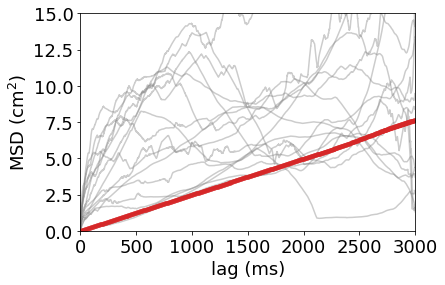

In [54]:
ylim=15
#plot mean radial velocities
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
for pid in pid_values_to_consider[:]:
    lagt_values,msd_values=compute_individual_mean_squared_displacement(df,dft1,dft2,DT,pid,pid_col=pid_col)
    ax.plot(lagt_values,msd_values*DS**2,alpha=0.4,color='gray')
    
#PlotMeanSquaredDisplacements     
PlotMeanSquaredDisplacements(ax, x_values, y_values, y_err_values, y_hat_values,c='C3')
# PlotMeanSquaredDisplacements(ax, x_values2, y_values2, y_err_values2, y_hat_values2,c='C4')
ax.set_ylim([0,ylim])
# plt.tight_layout()
# plt.show()
plt.xlim([0,3000])
plt.ylim([0,ylim])
plt.show()

In [41]:
# #TODO(later): make text interface for choosing new max_lagtime. Note max_lagtime is in units of frames, not time...
# print(f"If you want to save memory and decrease runtime decide on a reasonable value for max_lagtime!  maxt={max_lagtime}")

#TODO: load all of ^those imsd into python and compute the mean imsd, binning by lagt
#TODO: save resulting emsd to csv
#TODO: generate plots
#TODO: look at plots and decide whether to change the default tau_min and tau_max
#TODO: compute linear regression with tau_min and tau_max